<a href="https://www.kaggle.com/code/muradpitafi/banks-churn-prediction?scriptVersionId=153349459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


<h1> Understanding the Data </h1>

In [2]:
banks = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
banks.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
banks.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<h1> Data Distribution of categorical and numerical variables </h1>

In [6]:
import seaborn as sns

cat =  []
num = []
for i in banks.columns:
    if banks[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

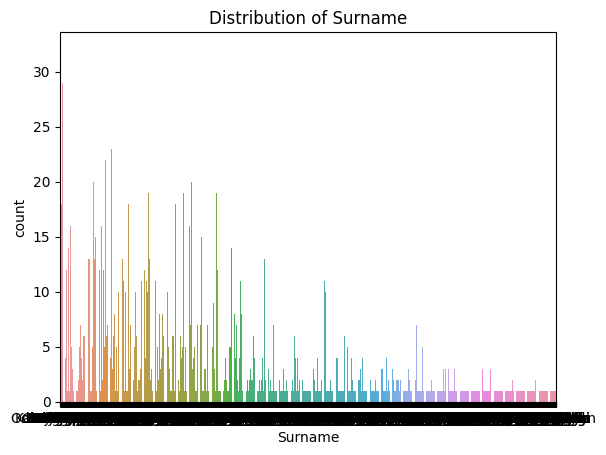

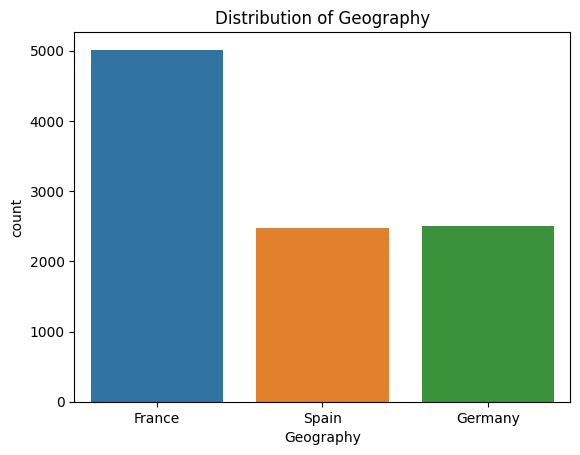

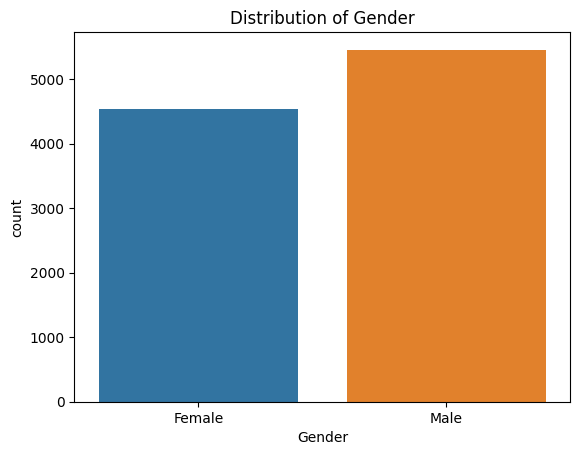

In [7]:
import matplotlib.pyplot as plt
for i in cat:
    plt.title(f'Distribution of {i}')
    sns.countplot(x = i, data = banks)
    plt.show()

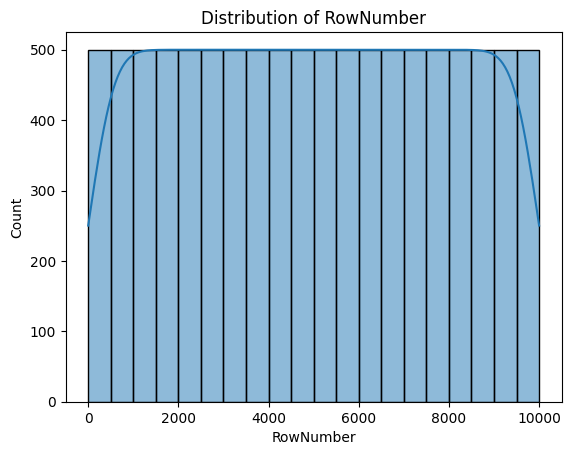

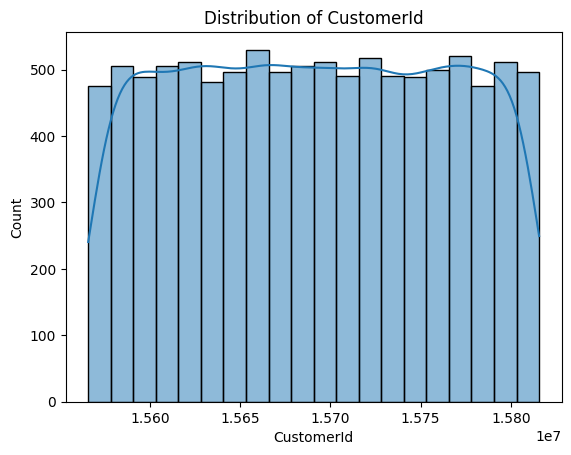

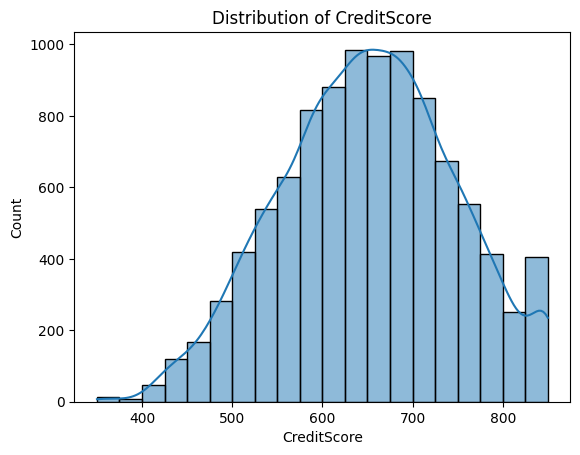

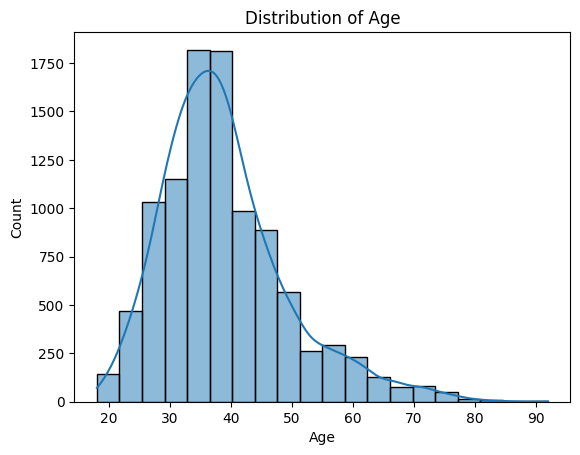

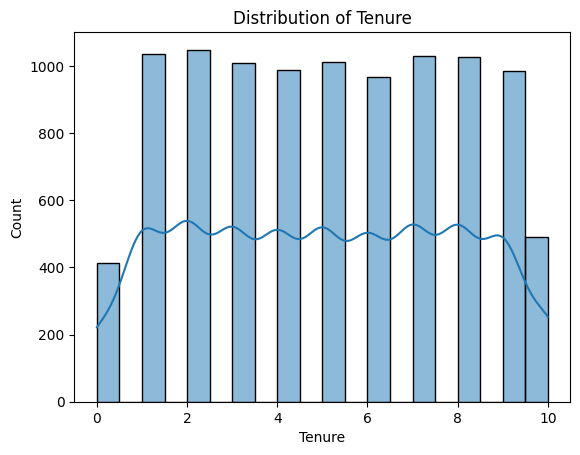

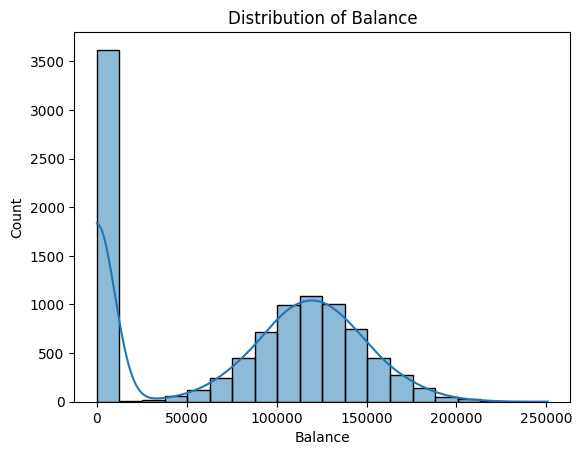

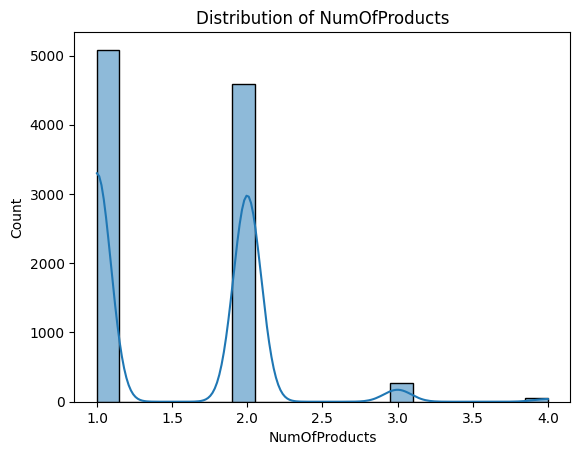

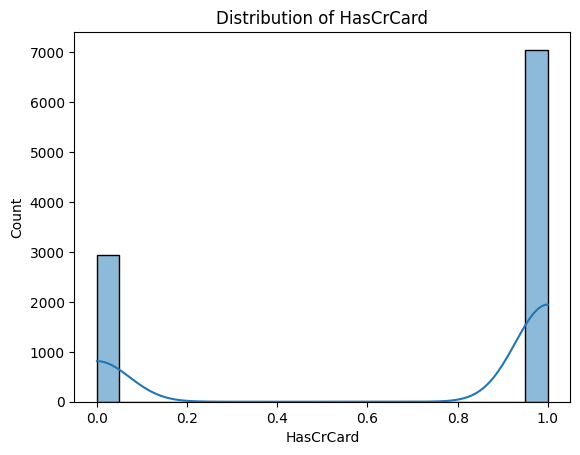

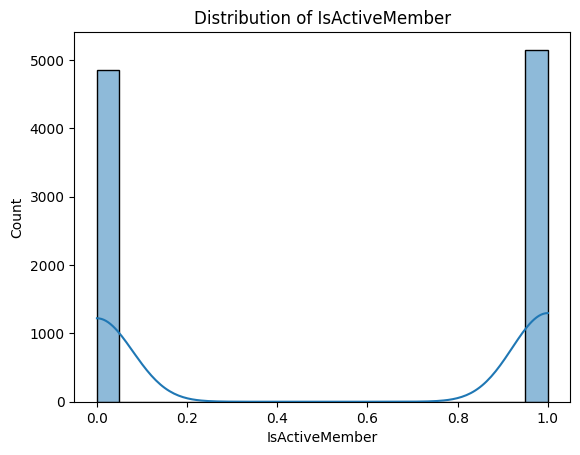

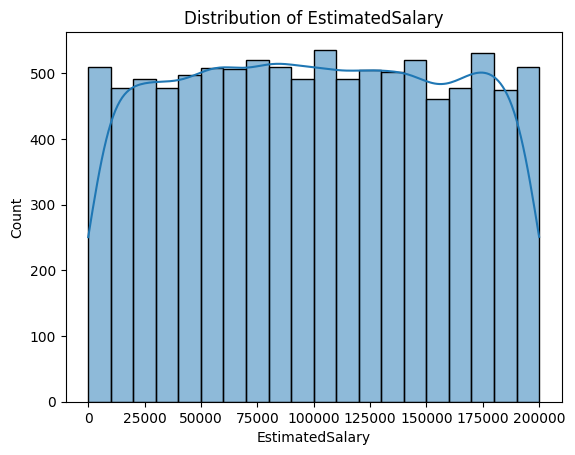

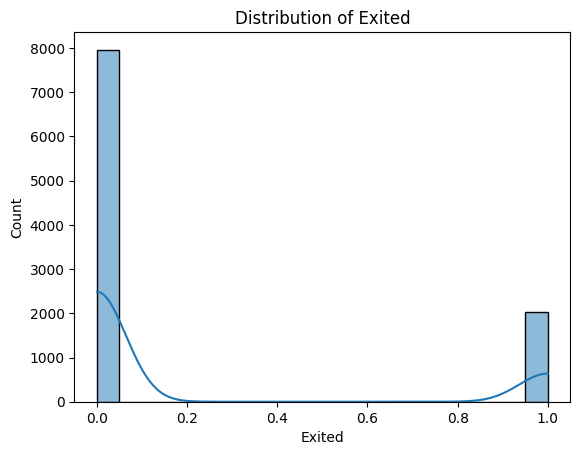

In [8]:
for i in num:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i, data = banks, bins = 20 , kde = True)
    plt.show()

In [9]:
 data = banks.drop(['CreditScore', 'CustomerId', 'RowNumber', 'Surname'], axis = 1)

<h1> transforming categorical variable to numerical </h1>

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data[['Geography']])
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,Female,39,1,0.00,2,0,0,93826.63,0
4,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['Gender'] = label_encoder.fit_transform(data[['Gender']])
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,39,1,0.00,2,0,0,93826.63,0
4,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])

In [13]:
x = data.drop(['Exited'], axis = 1)
y = data['Exited']

In [14]:
y = y.astype(int)

<h1> Feature selection </h1>

In [15]:
correlation_matrix = x.corr()

selected_features = correlation_matrix.iloc[:, 0].sort_values(ascending=False)[:6]

print(selected_features)

Geography         1.000000
Balance           0.069408
Age               0.022812
IsActiveMember    0.006724
Gender            0.004719
NumOfProducts     0.003972
Name: Geography, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [17]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score , f1_score , classification_report
import xgboost as xgb
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [18]:
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [19]:
models = {' Logistic Regression ' :LogisticRegression(),
          'Random Forest ': RandomForestClassifier(),
           'Support vector machine': SVC(), 
            'Xgboost ': xgb.XGBClassifier(), 
             'light gradient boost ': LGBMClassifier()}

import numpy as np
kf = KFold(n_splits=10, shuffle=True, random_state = 43)
for keys , values in models.items():
    
    cross_val_scores = cross_val_score(values, x, y , cv = kf)
    print(f'{keys} : {np.round(cross_val_scores,2)} ')
    print(" **** ")


 Logistic Regression  : [0.8  0.8  0.81 0.81 0.82 0.8  0.79 0.8  0.81 0.81] 
 **** 
Random Forest  : [0.86 0.85 0.87 0.87 0.85 0.85 0.86 0.84 0.86 0.88] 
 **** 
Support vector machine : [0.87 0.84 0.87 0.86 0.86 0.85 0.85 0.84 0.86 0.87] 
 **** 
Xgboost  : [0.85 0.85 0.86 0.86 0.85 0.85 0.86 0.84 0.86 0.86] 
 **** 
light gradient boost  : [0.86 0.85 0.86 0.87 0.86 0.86 0.86 0.84 0.86 0.88] 
 **** 


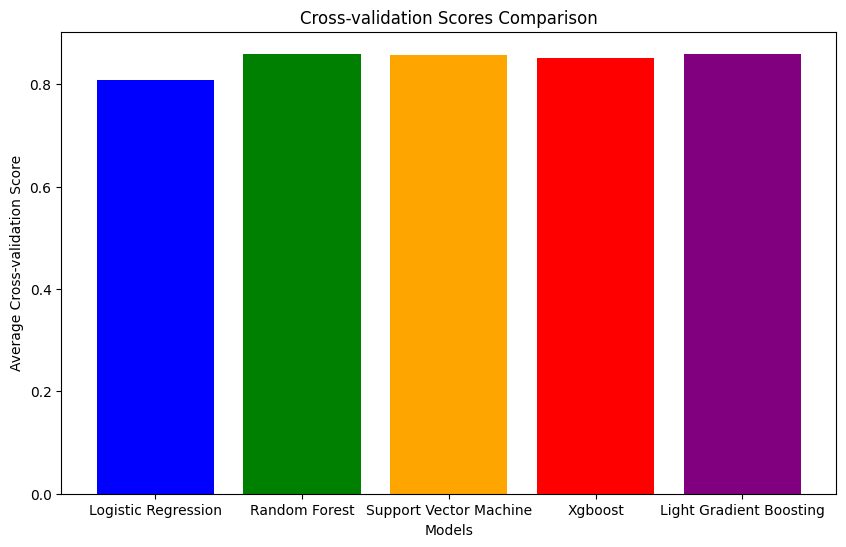

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Xgboost': xgb.XGBClassifier(),
    'Light Gradient Boosting': LGBMClassifier()
}

kf = KFold(n_splits=5, shuffle=True, random_state=43)

mean_scores = []

for model_name, model in models.items():
    fold_scores = cross_val_score(model, x, y, cv=kf)
    mean_scores.append(np.mean(fold_scores))

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mean_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Cross-validation Scores Comparison')
plt.xlabel('Models')
plt.ylabel('Average Cross-validation Score')
plt.show()


In [21]:
kernals = ['linear','poly', 'rbf', 'sigmoid']
from sklearn.svm import SVC
for i in kernals:
    svm = SVC(kernel = i)
    svm.fit(xtrain, ytrain)
    print(i)
    print("training score : ", svm.score(xtrain,ytrain))
    print("testing score " ,svm.score(xtest,ytest))
    print(" ___ ")

linear
training score :  0.793375
testing score  0.808
 ___ 
poly
training score :  0.850875
testing score  0.8645
 ___ 
rbf
training score :  0.859
testing score  0.869
 ___ 
sigmoid
training score :  0.667
testing score  0.689
 ___ 


In [22]:
lgbm = LGBMClassifier()
lgbm.fit(xtrain,ytrain)
ypred = lgbm.predict(xtest)  
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1616
           1       0.75      0.56      0.64       384

    accuracy                           0.88      2000
   macro avg       0.83      0.76      0.79      2000
weighted avg       0.87      0.88      0.87      2000



In [23]:
print(confusion_matrix(ytest,ypred)) 

[[1544   72]
 [ 168  216]]


In [24]:
for model_name, model in models.items():
    print(model_name)
    model.fit(xtrain, ytrain)
    print(f' Training accuracy : {model.score(xtrain,ytrain)}')
    print(f' Testing accuracy : {model.score(xtest,ytest)}')
    

Logistic Regression
 Training accuracy : 0.803375
 Testing accuracy : 0.8225
Random Forest
 Training accuracy : 0.999875
 Testing accuracy : 0.873
Support Vector Machine
 Training accuracy : 0.859
 Testing accuracy : 0.869
Xgboost
 Training accuracy : 0.94475
 Testing accuracy : 0.8715
Light Gradient Boosting
 Training accuracy : 0.9055
 Testing accuracy : 0.88


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

for model_name, model in models.items():
    print(model_name)
    model.fit(xtrain_resampled, ytrain_resampled)
    print(f' Training accuracy : {model.score(xtrain_resampled,ytrain_resampled)}')
    print(f' Testing accuracy : {model.score(xtest,ytest)}')
    
    

Logistic Regression
 Training accuracy : 0.7012761934772334
 Testing accuracy : 0.6915
Random Forest
 Training accuracy : 1.0
 Testing accuracy : 0.836
Support Vector Machine
 Training accuracy : 0.8218055774381597
 Testing accuracy : 0.781
Xgboost
 Training accuracy : 0.959350874428864
 Testing accuracy : 0.8705
Light Gradient Boosting
 Training accuracy : 0.9283913659996849
 Testing accuracy : 0.868


In [26]:
data['Balance'] = data['Balance'].replace(0, data['Balance'].median())

In [27]:
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [28]:
# from sklearn.model_selection import GridSearchCV
 
# param = {
#     'num_leaves': [30, 50, 100],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [5, 10, 15],
#     'min_child_samples': [20, 50, 100],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# best_hyp = GridSearchCV(estimator=lgbm, param_grid=param, cv = 5, scoring = 'accuracy')
# best_hyp.fit(xtrain,ytrain)

# print("best hyperparameters : ",best_hyp.best_params_)
# print('Best score : ', best_hyp.best_score_)

# print(f'test score : {best_hyp.score(xtest,ytest)}')

In [29]:
data2 = banks.drop(['CustomerId', 'RowNumber', 'Surname'], axis = 1)

In [30]:
data['CreditScore'] = banks['CreditScore']

In [31]:
data['CreditScore'] = scaler.fit_transform(data[['CreditScore']])

In [32]:
x = data.drop(['Exited'], axis = 1)
y = data['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20, random_state = 23)

In [33]:
# for model_name, model in models.items():
#     print(model_name)
#     model.fit(xtrain, ytrain)
#     print(f' Training accuracy : {model.score(xtrain,ytrain)}')
#     print(f' Testing accuracy : {model.score(xtest,ytest)}')
    